### 3. Modelos Univariantes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import numpy as np

In [2]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from tbats import TBATS

In [3]:
# Cargar los datos filtrados del primer notebook
df_filtrado = pd.read_csv('df_filtrado.csv')  # Importamos el csv

In [4]:
reservas_semanales = pd.read_csv('reservas_semanales1.csv', index_col='Fecha')  # Importamos el csv reservas
cancelaciones_semanales = pd.read_csv('cancelaciones_semanales1.csv', index_col='Fecha')  # Importamos el cancelaciones

In [5]:
reservas_semanales

,Reservas,DiferenciaReservas
Fecha,,
2015-07-05,85,NaN
2015-07-12,61,-24.0
2015-07-19,124,63.0
2015-07-26,134,10.0
2015-08-02,77,-57.0
...,...,...
2017-08-06,452,-11.0
2017-08-13,442,-10.0
2017-08-20,465,23.0


In [6]:
# Definimos el porcentaje de datos para cada conjunto
train_percent = 0.8
val_percent = 0.1
test_percent = 0.1

In [7]:
# Función para dividir una serie temporal en conjuntos
def dividir_series_temporales(series_temporal):
    len_total = len(series_temporal)
    len_train = int(train_percent * len_total)
    len_val = int(val_percent * len_total)

    # Dividir los datos
    train_data = series_temporal.iloc[:len_train]
    val_data = series_temporal.iloc[len_train:len_train + len_val]
    test_data = series_temporal.iloc[len_train + len_val:]

    return train_data, val_data, test_data

In [8]:
# Dividir las series temporales
train_reservas, val_reservas, test_reservas = dividir_series_temporales(reservas_semanales['Reservas'])
train_cancelaciones, val_cancelaciones, test_cancelaciones = dividir_series_temporales(cancelaciones_semanales['Cancelaciones'])

In [9]:
# Verificar las formas de los conjuntos
print("Entrenamiento Reservas:", train_reservas.shape)
print("Validación Reservas:", val_reservas.shape)
print("Prueba Reservas:", test_reservas.shape)

print("Entrenamiento Cancelaciones:", train_cancelaciones.shape)
print("Validación Cancelaciones:", val_cancelaciones.shape)
print("Prueba Cancelaciones:", test_cancelaciones.shape)

Entrenamiento Reservas: (91,)
Validación Reservas: (11,)
Prueba Reservas: (12,)
Entrenamiento Cancelaciones: (91,)
Validación Cancelaciones: (11,)
Prueba Cancelaciones: (12,)


In [10]:
# Modelo ARIMA

In [11]:
# Crear y entrenar el modelo ARIMA
arima_reservas = ARIMA(train_reservas, order=(1, 1, 1))
arima_reservas_fit = arima_reservas.fit()

/Users/Lucia/anaconda3/envs/AP/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/Users/Lucia/anaconda3/envs/AP/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/Users/Lucia/anaconda3/envs/AP/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


In [12]:
# Realizar predicciones en el conjunto de validación
predicciones_arima_reservas = arima_reservas_fit.get_forecast(steps=len(val_reservas))

In [13]:
# Ajustar modelo ARIMA a DiferenciaCancelaciones
arima_cancelaciones = ARIMA(train_cancelaciones, order=(1, 1, 1))
arima_cancelaciones_fit = arima_cancelaciones.fit()

/Users/Lucia/anaconda3/envs/AP/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/Users/Lucia/anaconda3/envs/AP/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/Users/Lucia/anaconda3/envs/AP/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


In [14]:
# Realizar predicciones en el conjunto de validación
predicciones_arima_cancelaciones = arima_cancelaciones_fit.get_forecast(steps=len(val_cancelaciones))

In [15]:
# Calcular errores para ARIMA Reservas
mse_arima_r = mean_squared_error(val_reservas, predicciones_arima_reservas.predicted_mean)
rmse_arima_r = np.sqrt(mse_arima_r)
mae_arima_r = mean_absolute_error(val_reservas, predicciones_arima_reservas.predicted_mean)

In [16]:
# Calcular errores para ARIMA Cancelaciones
mse_arima_c = mean_squared_error(val_cancelaciones, predicciones_arima_cancelaciones.predicted_mean)
rmse_arima_c = np.sqrt(mse_arima_c)
mae_arima_c = mean_absolute_error(val_cancelaciones, predicciones_arima_cancelaciones.predicted_mean)

In [17]:
print("Errores para ARIMA Reservas - MSE: {}, RMSE: {}, MAE: {}".format(mse_arima_r, rmse_arima_r, mae_arima_r))

Errores para ARIMA Reservas - MSE: 1427.6924548757027, RMSE: 37.784817782751084, MAE: 30.638227974570498


In [18]:
print("Errores para ARIMA Cancelaciones - MSE: {}, RMSE: {}, MAE: {}".format(mse_arima_c, rmse_arima_c, mae_arima_c))

Errores para ARIMA Cancelaciones - MSE: 40606.6010278162, RMSE: 201.5107963058461, MAE: 180.8348250899109


In [19]:
# Modelo ETS

In [20]:
# Proporcionar la cantidad de periodos estacionales al modelo ETS en reservas
ets_reservas = ExponentialSmoothing(train_reservas, seasonal='multiplicative', seasonal_periods=4) 
ets_reservas_fit = ets_reservas.fit()

/Users/Lucia/anaconda3/envs/AP/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


In [21]:
# Predecir con el modelo en el conjunto de validación
predictions_ets_reservas = ets_reservas_fit.forecast(steps=len(val_reservas))

In [22]:
# Proporcionar la cantidad de periodos estacionales al modelo ETS en cancelaciones
ets_cancelaciones = ExponentialSmoothing(train_cancelaciones, seasonal='multiplicative', seasonal_periods=4) 
ets_cancelaciones_fit = ets_cancelaciones.fit()

/Users/Lucia/anaconda3/envs/AP/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


In [23]:
# Predecir con el modelo en el conjunto de validación
predictions_ets_cancelaciones = ets_cancelaciones_fit.forecast(steps=len(val_cancelaciones))

In [24]:
# Calcular errores para ETS
mse_ets_r = mean_squared_error(val_reservas, predictions_ets_reservas)
rmse_ets_r = np.sqrt(mse_ets_r)
mae_ets_r = mean_absolute_error(val_reservas, predictions_ets_reservas)

In [25]:
# Calcular errores para ETS
mse_ets_c = mean_squared_error(val_cancelaciones, predictions_ets_reservas)
rmse_ets_c = np.sqrt(mse_ets_c)
mae_ets_c = mean_absolute_error(val_cancelaciones, predictions_ets_reservas)

In [26]:
print("Errores para ETS Reservas - MSE: {}, RMSE: {}, MAE: {}".format(mse_ets_r, rmse_ets_r, mae_ets_r))

Errores para ETS Reservas - MSE: 1635.2271698219934, RMSE: 40.43794220558204, MAE: 36.051897487439504


In [27]:
print("Errores para ETS Cancelaciones - MSE: {}, RMSE: {}, MAE: {}".format(mse_ets_c, rmse_ets_c, mae_ets_c))

Errores para ETS Cancelaciones - MSE: 14355.201867005635, RMSE: 119.81319571318359, MAE: 92.47567967950408


In [28]:
# Modelo TBATS

In [29]:
# Crear y entrenar el modelo TBATS
estimator_r = TBATS(seasonal_periods=(12, 6)) 
tbats_reservas = estimator_r.fit(train_reservas)

# Predecir con el modelo en el conjunto de validación
predictions_tbats_reservas = tbats_reservas.forecast(steps=len(val_reservas))

In [30]:
# Crear y entrenar el modelo TBATS cancelaciones
estimator_c = TBATS(seasonal_periods=(12, 6)) 
tbats_cancelaciones = estimator_c.fit(train_cancelaciones)

# Predecir con el modelo en el conjunto de validación
predictions_tbats_cancelaciones = tbats_cancelaciones.forecast(steps=len(val_cancelaciones))

In [31]:
# Calcular errores para TBATS reservas
mse_tbats_r = mean_squared_error(val_reservas, predictions_tbats_reservas)
rmse_tbats_r = np.sqrt(mse_tbats_r)
mae_tbats_r = mean_absolute_error(val_reservas, predictions_tbats_reservas)

In [32]:
# Calcular errores para TBATS cancelaciones
mse_tbats_c = mean_squared_error(val_cancelaciones, predictions_tbats_cancelaciones)
rmse_tbats_c = np.sqrt(mse_tbats_c)
mae_tbats_c = mean_absolute_error(val_cancelaciones, predictions_tbats_cancelaciones)

In [33]:
print("Errores para TBATS Reservas - MSE: {}, RMSE: {}, MAE: {}".format(mse_tbats_r, rmse_tbats_r, mae_tbats_r))

Errores para TBATS Reservas - MSE: 3879.12065952467, RMSE: 62.28258712934675, MAE: 51.37798704508364


In [34]:
print("Errores para TBATS Cancelaciones - MSE: {}, RMSE: {}, MAE: {}".format(mse_tbats_c, rmse_tbats_c, mae_tbats_c))

Errores para TBATS Cancelaciones - MSE: 39869.43787873448, RMSE: 199.67332791020058, MAE: 179.01453660934473


In [37]:
import pandas as pd
from tabulate import tabulate

# Crear un diccionario con los resultados
resultados = {
    'Modelo': ['ARIMA', 'ETS', 'TBATS'],
    'MSE Reservas': [mse_arima_r, mse_ets_r, mse_tbats_r],
    'RMSE Reservas': [rmse_arima_r, rmse_ets_r, rmse_tbats_r],
    'MAE Reservas': [mae_arima_r, mae_ets_r, mae_tbats_r],
    'MSE Cancelaciones': [mse_arima_c, mse_ets_c, mse_tbats_c],
    'RMSE Cancelaciones': [rmse_arima_c, rmse_ets_c, rmse_tbats_c],
    'MAE Cancelaciones': [mae_arima_c, mae_ets_c, mae_tbats_c],
}

# Crear un DataFrame con los resultados
df_resultados = pd.DataFrame(resultados)

In [38]:
# Configurar 'Fecha' como el índice
df_resultados.set_index('Modelo', inplace=True)

In [39]:
df_resultados

,MSE Reservas,RMSE Reservas,MAE Reservas,MSE Cancelaciones,RMSE Cancelaciones,MAE Cancelaciones
Modelo,,,,,,
ARIMA,1427.692455,37.784818,30.638228,40606.601028,201.510796,180.834825
ETS,1635.227170,40.437942,36.051897,14355.201867,119.813196,92.475680
TBATS,3879.120660,62.282587,51.377987,39869.437879,199.673328,179.014537


Si damos más importancia a la robustez y simplicidad del modelo, preferimos ARIMA, ya que parece tener errores más bajos en todas las métricas.

Si queremos un modelo más complejo pero con posiblemente mejor rendimiento, ETS sería la opción.

En este caso nos vamos a quedar con el modelo ETS ya que es el mejor entre los tres modelos evaluados, ya que tiene los errores de predicción bajos y posiblemente tendrá mejor rendimiento.

### 4. Predicción de las próximas 5 semanas

In [40]:
# Obtener la última fecha en la serie temporal
ultima_fecha = reservas_semanales.index[-1]

In [41]:
# Generar las próximas 5 semanas a partir de la última fecha
proximo_index = pd.date_range(start=ultima_fecha, periods=6, freq='W')[1:]

In [42]:
# Crear y entrenar el modelo ETS
model_ets = ExponentialSmoothing(reservas_semanales['Reservas'], seasonal='multiplicative', seasonal_periods=4)
model_ets_fit = model_ets.fit()

/Users/Lucia/anaconda3/envs/AP/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


In [43]:
# Realizar la predicción para las próximas 5 semanas
forecast_ets = model_ets_fit.forecast(steps=len(proximo_index))
# Imprimir las predicciones
print(forecast_ets)

2017-09-10    295.088256
2017-09-17    296.488751
2017-09-24    283.534818
2017-10-01    293.740644
2017-10-08    295.088256
Freq: W-SUN, dtype: float64


In [44]:
# Obtener la última fecha en la serie temporal
ultima_fecha_c = cancelaciones_semanales.index[-1]

In [45]:
# Generar las próximas 5 semanas a partir de la última fecha
proximo_index_c = pd.date_range(start=ultima_fecha_c, periods=6, freq='W')[1:]

In [46]:
# Cancelaciones
model_ets_c = ExponentialSmoothing(train_cancelaciones, seasonal='multiplicative', seasonal_periods=4)
model_ets_fit_c = model_ets_c.fit()

/Users/Lucia/anaconda3/envs/AP/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


In [47]:
# Realizar la predicción para las próximas 5 semanas
forecast_ets_c = model_ets_fit_c.forecast(steps=len(proximo_index_c))
# Imprimir las predicciones
print(forecast_ets_c)

2017-04-02    285.049905
2017-04-09    236.059150
2017-04-16    279.336585
2017-04-23    319.520654
2017-04-30    285.049905
Freq: W-SUN, dtype: float64


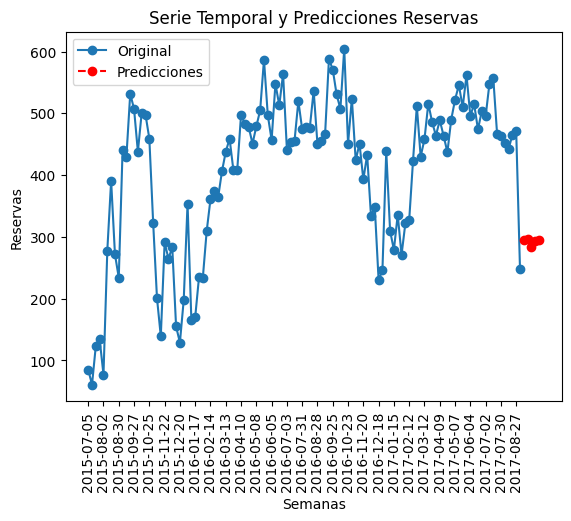

In [48]:
import matplotlib.pyplot as plt

# Graficar la serie temporal original
plt.plot(reservas_semanales['Reservas'], label='Original', marker='o')

# Graficar las predicciones
forecast_index = range(len(reservas_semanales), len(reservas_semanales) + len(forecast_ets))
plt.plot(forecast_index, forecast_ets, label='Predicciones', marker='o', linestyle='dashed', color='red')

# Etiquetas y leyendas
plt.xlabel('Semanas')
plt.ylabel('Reservas')
plt.title('Serie Temporal y Predicciones Reservas')
plt.xticks(reservas_semanales.index[::4], rotation='vertical') # Establecer marcadores en el eje x para mostrar solo algunas fechas
plt.legend()

# Mostrar la gráfica
plt.show()

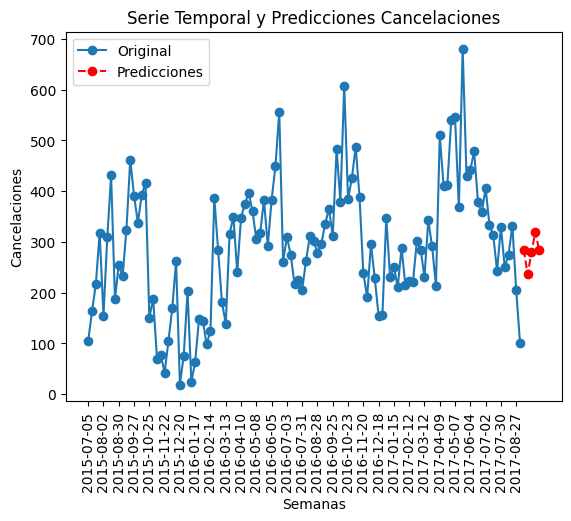

In [49]:
# Graficar la serie temporal original
plt.plot(cancelaciones_semanales['Cancelaciones'], label='Original', marker='o')

# Graficar las predicciones
forecast_index = range(len(cancelaciones_semanales), len(cancelaciones_semanales) + len(forecast_ets_c))
plt.plot(forecast_index, forecast_ets_c, label='Predicciones', marker='o', linestyle='dashed', color='red')

# Etiquetas y leyendas
plt.xlabel('Semanas')
plt.ylabel('Cancelaciones')
plt.title('Serie Temporal y Predicciones Cancelaciones')
plt.xticks(cancelaciones_semanales.index[::4], rotation='vertical') # Establecer marcadores en el eje x para mostrar solo algunas fechas
plt.legend()

# Mostrar la gráfica
plt.show()

In [ ]:
# Guardar las tablas de reservas y cancelaciones en archivos CSV
forecast_ets.to_csv('reservas_semanales_prediccion.csv')
forecast_ets_c.to_csv('cancelaciones_semanales_prediccion.csv')